In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_style("white")
sns.set_theme()

import warnings 
warnings.filterwarnings("ignore") 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-spending-dataset/customer_data.csv


In [72]:
df = pd.read_csv('/kaggle/input/customer-spending-dataset/customer_data.csv')
df.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [73]:
df.dtypes

name                   object
age                     int64
gender                 object
education              object
income                  int64
country                object
purchase_frequency    float64
spending              float64
dtype: object

In [74]:
df.isna().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,41.754000,13.778582,18.000,30.000,42.000,54.0000,65.0
income,1000.0,59277.852000,23258.377128,20031.000,38825.500,58972.000,79114.0000,99780.0
purchase_frequency,1000.0,0.554600,0.284675,0.100,0.300,0.600,0.8000,1.0
spending,1000.0,9613.296835,5484.707210,611.985,5020.425,9430.395,13645.5075,25546.5


In [76]:
df.duplicated().sum()

0

In [77]:
df.gender.value_counts()

gender
Male      501
Female    499
Name: count, dtype: int64

In [78]:
df.education.value_counts()

education
Bachelor       271
PhD            248
High School    245
Master         236
Name: count, dtype: int64

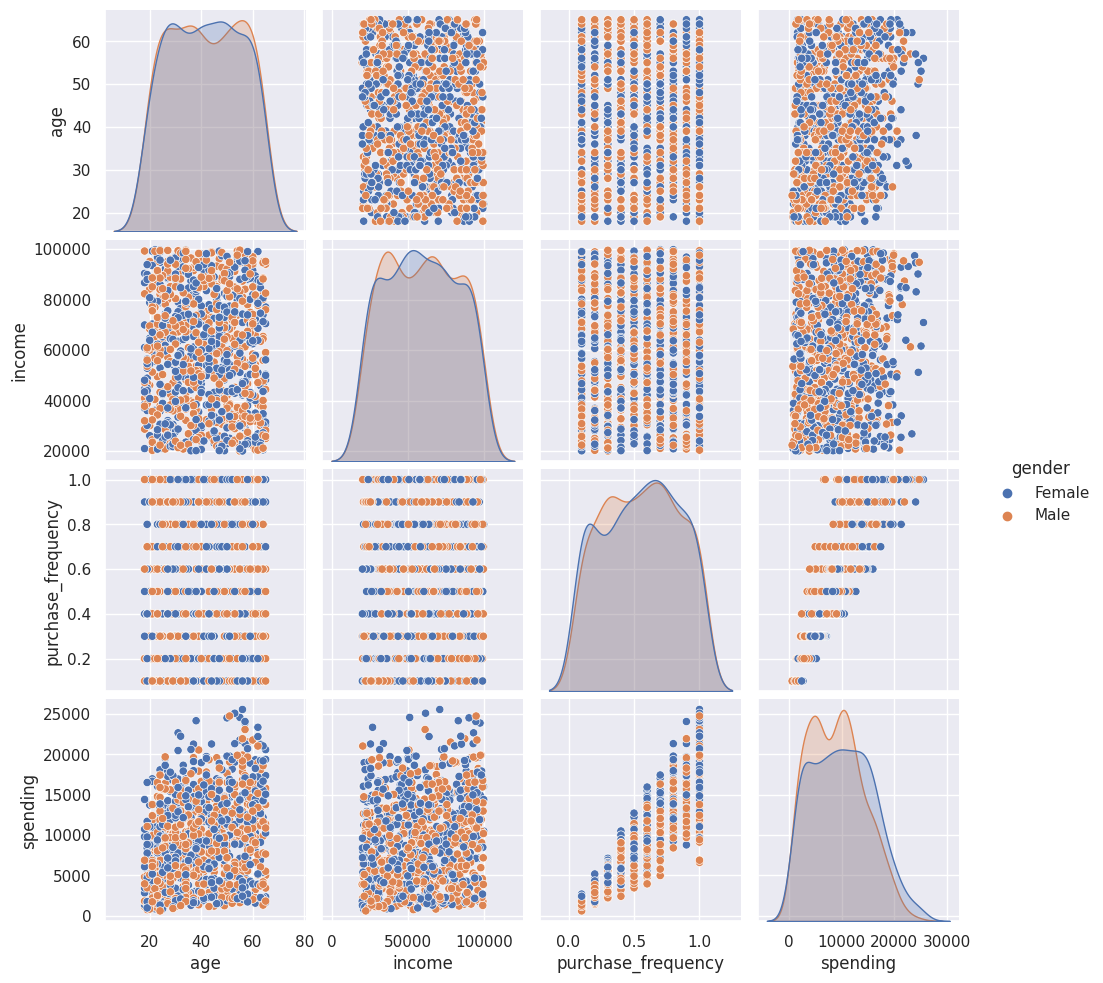

In [79]:
sns.set(rc = {"figure.figsize":(5,2.5)})

sns.pairplot(df,vars=['age','income','purchase_frequency','spending'],hue="gender")

Text(0.5, 1.0, 'Distribution of age')

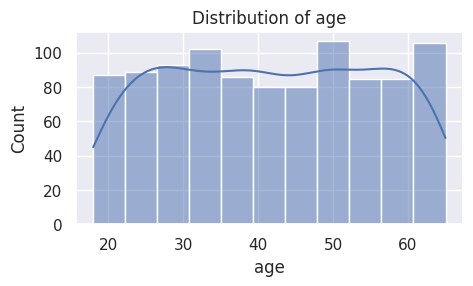

In [80]:
sns.histplot(df.age,kde=True)
plt.title("Distribution of age")

Text(0.5, 1.0, 'Distribution of income')

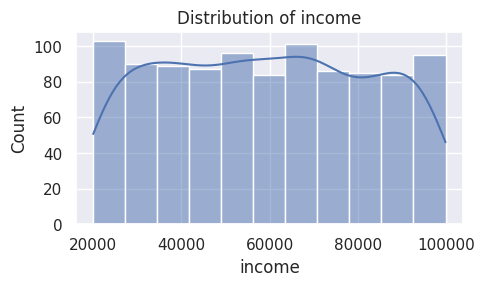

In [81]:
sns.histplot(df.income,kde=True)
plt.title("Distribution of income")

Text(0.5, 1.0, 'Distribution of spending')

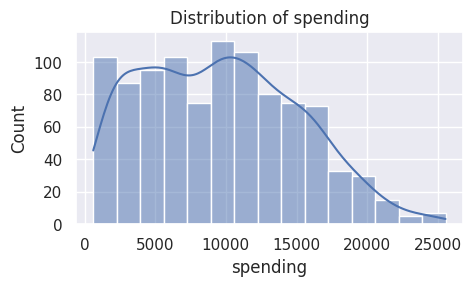

In [82]:
sns.histplot(df.spending,kde=True)
plt.title("Distribution of spending")

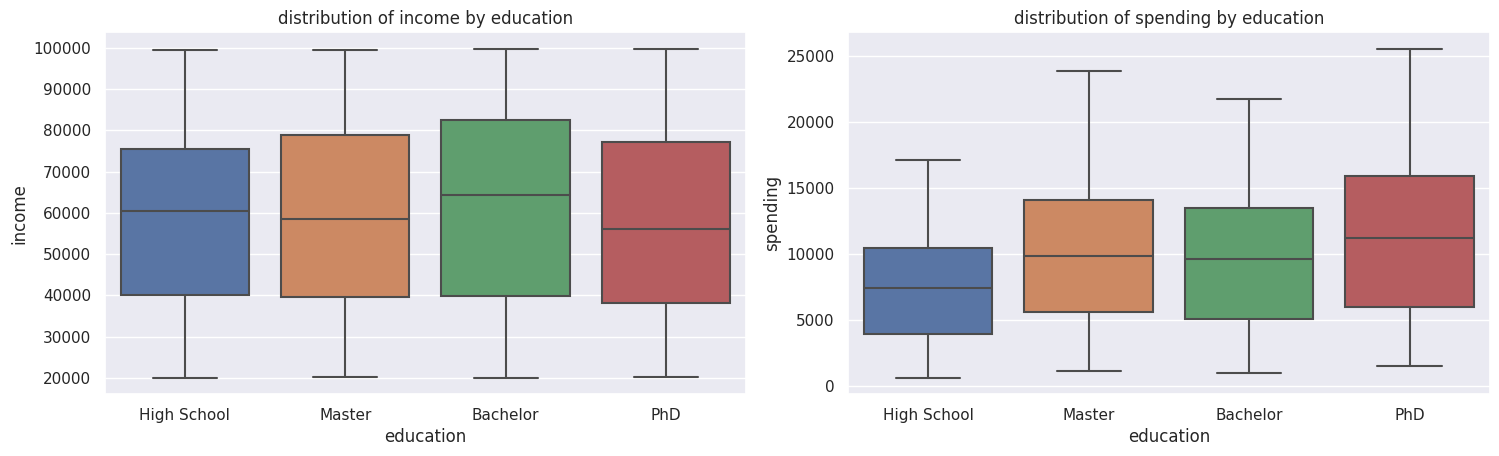

In [83]:
num_col = df[['income','spending']]
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    plt.title(f"distribution of {column} by education")
    sns.boxplot(x=df.education,y=df[column])
    
plt.tight_layout(pad = 1.0)


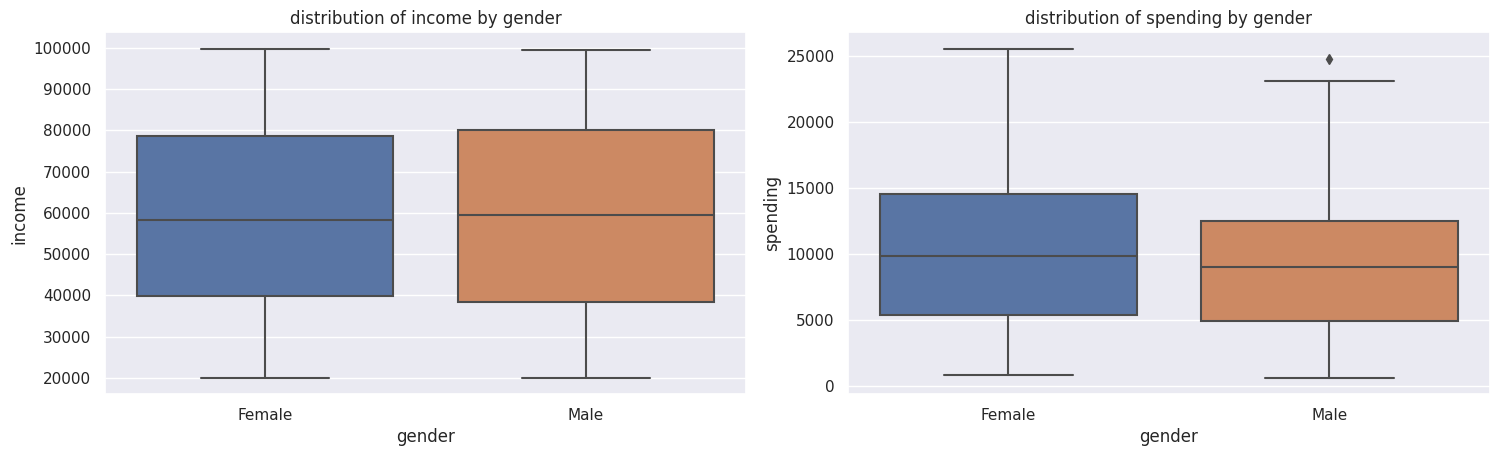

In [84]:
num_col = df[['income','spending']]
plt.figure(figsize=(30,30))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    plt.title(f"distribution of {column} by gender")
    sns.boxplot(x=df.gender,y=df[column])
    
plt.tight_layout(pad = 1.0)

In [85]:
from sklearn.preprocessing import OneHotEncoder

# Example categorical data
categories = df.education
# categories
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Set sparse=False for dense output

# Fit and transform the data
education_encoded_data = pd.DataFrame(encoder.fit_transform(np.array(categories).reshape(-1, 1))
                                                            ,columns=['Bachelor','High School','Master','PhD'])

df_preprocess = df.join(education_encoded_data)


In [86]:
df_preprocess = df_preprocess.drop('education',axis=1)


In [87]:
# Example categorical data
categories = df.gender
# categories
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Set sparse=False for dense output

# Fit and transform the data
gender_encoded_data = pd.DataFrame(encoder.fit_transform(np.array(categories).reshape(-1, 1))
                                                            ,columns=['Female','Male'])

df_preprocess = df_preprocess.join(gender_encoded_data)

In [88]:
df_preprocess = df_preprocess.drop('gender',axis=1)
df_preprocess

,name,age,income,country,purchase_frequency,spending,Bachelor,High School,Master,PhD,Female,Male
0,Teresa Williams MD,42,53936,Slovenia,0.9,13227.120,0.0,1.0,0.0,0.0,1.0,0.0
1,Christine Myers,49,82468,Aruba,0.6,12674.040,0.0,0.0,1.0,0.0,1.0,0.0
2,Dwayne Moreno,55,56941,Cyprus,0.3,5354.115,1.0,0.0,0.0,0.0,0.0,1.0
3,Amy Norton,24,60651,Palau,0.2,2606.510,1.0,0.0,0.0,0.0,1.0,0.0
4,Tonya Adams,64,81884,Zambia,0.9,18984.780,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Jason Haas,42,98170,Bosnia and Herzegovina,0.7,17435.950,0.0,0.0,0.0,1.0,1.0,0.0
996,Sharon Valdez,39,59174,Eritrea,0.9,11662.830,0.0,1.0,0.0,0.0,0.0,1.0
997,Andrew Taylor,50,59808,Serbia,0.4,7196.160,0.0,0.0,1.0,0.0,0.0,1.0
998,Jessica Johnson,50,58272,Cyprus,0.7,13939.520,0.0,0.0,1.0,0.0,1.0,0.0


In [89]:
df_preprocess = df_preprocess.drop('country',axis=1)
df_preprocess

,name,age,income,purchase_frequency,spending,Bachelor,High School,Master,PhD,Female,Male
0,Teresa Williams MD,42,53936,0.9,13227.120,0.0,1.0,0.0,0.0,1.0,0.0
1,Christine Myers,49,82468,0.6,12674.040,0.0,0.0,1.0,0.0,1.0,0.0
2,Dwayne Moreno,55,56941,0.3,5354.115,1.0,0.0,0.0,0.0,0.0,1.0
3,Amy Norton,24,60651,0.2,2606.510,1.0,0.0,0.0,0.0,1.0,0.0
4,Tonya Adams,64,81884,0.9,18984.780,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,Jason Haas,42,98170,0.7,17435.950,0.0,0.0,0.0,1.0,1.0,0.0
996,Sharon Valdez,39,59174,0.9,11662.830,0.0,1.0,0.0,0.0,0.0,1.0
997,Andrew Taylor,50,59808,0.4,7196.160,0.0,0.0,1.0,0.0,0.0,1.0
998,Jessica Johnson,50,58272,0.7,13939.520,0.0,0.0,1.0,0.0,1.0,0.0


In [91]:
minMaxScaler = MinMaxScaler()
df_preprocess['age'] = minMaxScaler.fit_transform(df_preprocess['age'].values.reshape(-1,1))
df_preprocess['income'] = minMaxScaler.fit_transform(df_preprocess['income'].values.reshape(-1,1))
df_preprocess['spending'] = minMaxScaler.fit_transform(df_preprocess['spending'].values.reshape(-1,1))
df_preprocess.head()

,name,age,income,purchase_frequency,spending,Bachelor,High School,Master,PhD,Female,Male
0,Teresa Williams MD,0.510638,0.425146,0.9,0.505931,0.0,1.0,0.0,0.0,1.0,0.0
1,Christine Myers,0.659574,0.782919,0.6,0.483749,0.0,0.0,1.0,0.0,1.0,0.0
2,Dwayne Moreno,0.787234,0.462827,0.3,0.190183,1.0,0.0,0.0,0.0,0.0,1.0
3,Amy Norton,0.127660,0.509348,0.2,0.079991,1.0,0.0,0.0,0.0,1.0,0.0
4,Tonya Adams,0.978723,0.775596,0.9,0.736842,0.0,0.0,1.0,0.0,0.0,1.0


In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

features_to_combine = ['age','income','purchase_frequency','spending','Bachelor', 'High School',
                       'Master', 'PhD', 'Female', 'Male']

pca_df = pd.DataFrame(pca.fit_transform(df_preprocess[features_to_combine]))
pca.explained_variance_

array([0.50238246, 0.26424542])

Text(0.5, 1.0, 'PCA 1 againt PCA 2')

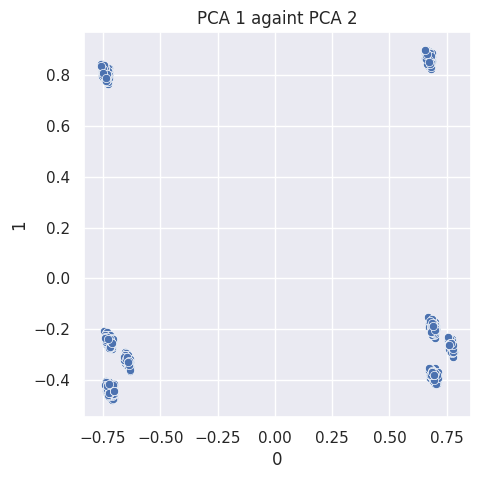

In [96]:
sns.set(rc={"figure.figsize":(5,5)})

sns.scatterplot(x=pca_df.iloc[:,0],y=pca_df.iloc[:,1])
plt.title('PCA 1 againt PCA 2')

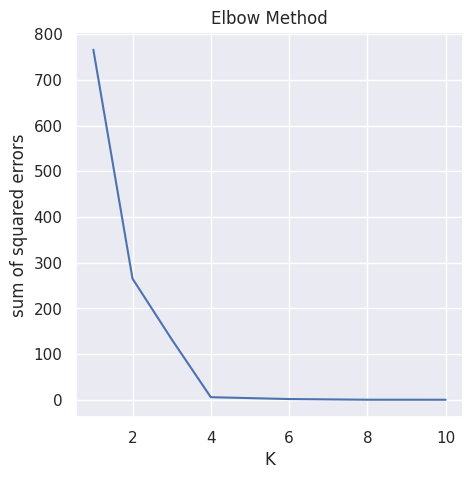

In [97]:
wcss = []
k_range = range(1, 11)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    
plt.xlabel('K')
plt.ylabel('sum of squared errors')
plt.title('Elbow Method')
plt.plot(k_range,wcss)

In [99]:
num_clusters = 4 
kmeans = KMeans(n_clusters = num_clusters)
predictions = kmeans.fit_predict(pca_df)

clusters = pd.DataFrame(predictions,columns=['Cluster'])
clusters

,Cluster
0,2
1,2
2,3
3,0
4,1
...,...
995,2
996,1
997,1
998,2


In [100]:
pca_df_clustered = pca_df.join(clusters)
pca_df_clustered

,0,1,Cluster
0,-0.652012,-0.317518,2
1,-0.726356,-0.229135,2
2,0.677086,0.863488,3
3,-0.727731,0.786309,0
4,0.672609,-0.157958,1
...,...,...,...
995,-0.724653,-0.415574,2
996,0.760172,-0.262136,1
997,0.690979,-0.188954,1
998,-0.729764,-0.238505,2


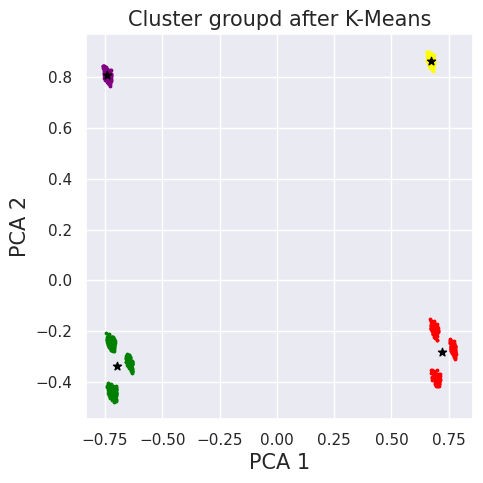

In [110]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
colors = ['purple', 'red', 'green', 'yellow']
for group in range(num_clusters):
    ax.scatter(x=pca_df_clustered.iloc[:,0][pca_df_clustered['Cluster'] == group]
               ,y=pca_df_clustered.iloc[:,1][pca_df_clustered['Cluster'] == group]
               ,color=colors[group],s=3)
    
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],c='black',marker='*')
plt.title('Cluster groupd after K-Means',fontsize=15)
plt.xlabel('PCA 1',fontsize=15)
plt.ylabel('PCA 2',fontsize=15)
plt.show()

In [111]:
df['cluster'] = clusters.values
df

,name,age,gender,education,income,country,purchase_frequency,spending,cluster
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120,2
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040,2
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115,3
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510,0
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780,1
...,...,...,...,...,...,...,...,...,...
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950,2
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830,1
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160,1
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520,2
